## Data Mining

## Classification

Classification is a fundamental task in machine learning and data analysis, with applications across various domains. Its importance lies in its ability to categorize or classify data into predefined classes or categories based on input features.

Firstly we are going to read the data  and and import the necessary libraries.

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
# Load the data set from  students.csv
df_clas=pd.read_csv("Processed_dataset.csv")
print(df_clas.head())

   diagnosis      id  concave points_worst  perimeter_worst  perimeter_mean  \
0          0  903811             -1.269231          -0.8446       -0.966879   
1          0  864033             -1.269231          -0.8446       -0.966879   
2          0   91227             -1.269231          -0.8446       -0.966879   
3          0  914101             -1.269231          -0.8446       -0.966879   
4          0  868223             -1.269231          -0.8446       -0.966879   

   radius_worst  radius_mean  concave points_mean  concavity_mean  area_mean  \
0      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   
1      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   
2      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   
3      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   
4      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   

   compactness_mean  concavity_worst  
0    

preparing the data for training a machine learning model by separating the features (x) from the target variable (y). This is a preprocessing step before training a classification model 

In [8]:
fn=df_clas.keys().tolist() [1:] #geting a a list of column names from data set exclude the first element (lable)and convert a list to a Python list
x=df_clas[fn] #creates a new DataFrame x containing  the list of feature names fn obtained in the previous line.
y=df_clas['diagnosis'] #creates a Series y containing the target variable (diagnosis)
print(x)

         id  concave points_worst  perimeter_worst  perimeter_mean  \
0    903811             -1.269231        -0.844600       -0.966879   
1    864033             -1.269231        -0.844600       -0.966879   
2     91227             -1.269231        -0.844600       -0.966879   
3    914101             -1.269231        -0.844600       -0.966879   
4    868223             -1.269231        -0.844600       -0.966879   
..      ...                   ...              ...             ...   
348  926125              1.446154         0.868871        2.379281   
349  926424              1.446154         0.868871        2.379281   
350  926682              0.088462         0.868871        0.706201   
351  926954              0.088462         0.868871        0.706201   
352  927241              1.446154         0.868871        0.706201   

     radius_worst  radius_mean  concave points_mean  concavity_mean  \
0       -0.845160    -0.985477            -0.791684       -0.686121   
1       -0.845160

splitting the dataset into training and testing sets and specifies the proportion of the dataset to include in the test split. Here, 30% of the data will be reserved for testing, and the remaining 70% will be used for training,additionally Setting a random seed ensures that the split is deterministic and the same split is obtained each time the code is run.
* x_train: This contains the features of the training set.* 
x_test: This contains the features of the testing set
*  .* 
y_train: This contains the target values of the training se
* t* .
y_test: This contains the target values of the testing s
  
These subsets are used for training and evaluating machine learning models. et.

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

initialization a decision tree classifier, train it using the training data, and then use it to predict labels for the test data.





In [10]:
Tclf= DecisionTreeClassifier() #Gini is the selection measure by The default for initialization a decision tree classifie
Tclf=Tclf.fit(x_train,y_train) # The fit method takes the features (x_train) and corresponding target labels (y_train) as input and fits the model to the training data.
y_pred=Tclf.predict(x_test) #The predict method takes the features of the test set as input and returns the predicted labels (y_pred) based on the learned patterns.

Calculate the accuracy of the classifier's predictions on the test data and print it. The accuracy score is calculated by comparing the predicted labels (y_pred) to the actual labels (y_test).

In [11]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred)) 

Accuracy: 0.9339622641509434


Provide a visual representation of how well the classifier performs in terms of correct and incorrect prediction for each class.

[[40  4]
 [ 3 59]]


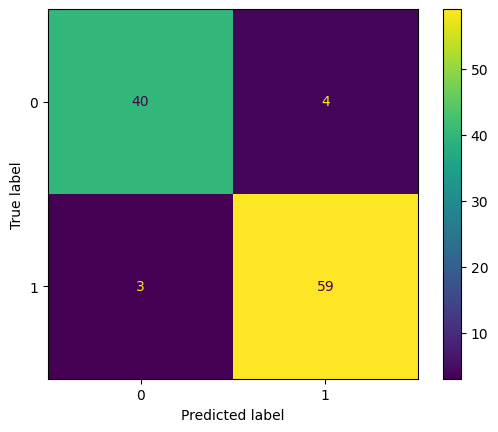

In [12]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred) # Computes the confusion matrix by comparing the true labels (y_test) with the predicted labels (y_pred)
print(cm)  #print The confusion matrix which is a table that describes the performance of a classification model.

cn=df_clas['diagnosis'].unique() # Retrieves the unique classes (diagnosis values) to be used as display labels in the confusion matrix visualization.

disp=ConfusionMatrixDisplay.from_estimator(Tclf,x_test,y_test, display_labels=cn) #display the confusion matrix visualization

We will use different test sizes to find out which test size provides the best balance between training and testing, resulting in the highest accuracy. The sizes we will use are 0.5 and 0.1

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=1) # changing test_size to be 0.5

In [14]:
Tclf= DecisionTreeClassifier() #Gini is the selection measure by The default
Tclf=Tclf.fit(x_train,y_train)
y_pred=Tclf.predict(x_test)

In [15]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9209039548022598


[[64  8]
 [ 6 99]]


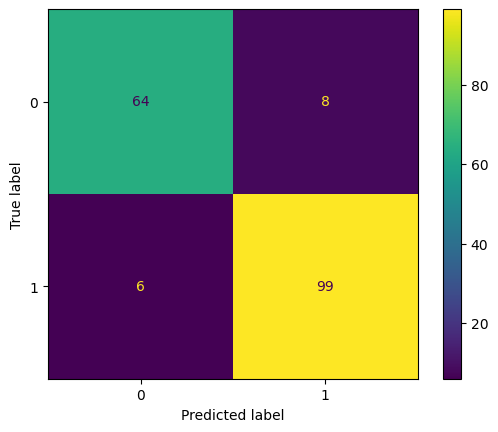

In [16]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df_clas['diagnosis'].unique()

disp=ConfusionMatrixDisplay.from_estimator(Tclf,x_test,y_test, display_labels=cn)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)  # changing test_size to be 0.1

In [18]:
Tclf= DecisionTreeClassifier() #Gini is the selection measure by The default
Tclf=Tclf.fit(x_train,y_train)
y_pred=Tclf.predict(x_test)

In [19]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8888888888888888


[[12  2]
 [ 2 20]]


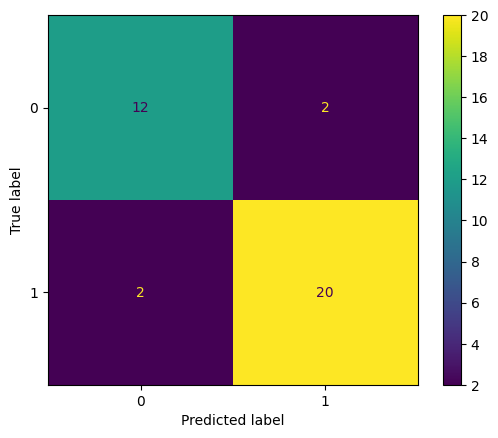

In [20]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df_clas['diagnosis'].unique()

disp=ConfusionMatrixDisplay.from_estimator(Tclf,x_test,y_test, display_labels=cn)

we can observe:
* The highest accuracy is achieved when the test size is 30%, with an accuracy of approximately 0.934.* 
When the test size increases to 50%, the accuracy slightly decreases to around 0.90
* .
With a test size of 10%, the accuracy further decreases to approximately 0.889.

a larger test size means less data available for training, which might lead to decreased model performance due to the model having less data to learn from. However, it's also possible for a smaller test size to cause overfitting, where the model performs well on the test set but poorly on unseen dat

Therefore, it is important to balance training sizes and test sets to ensure that the model generalizes well to unseen data while still training on a sufficient amount of data. In this case, a test size of 30% seems to provide the best balance between training and testing, resulting in the highest accuracy.a.

 initialization a plot, converts class names to strings, and then visualizes the decision tree . The resulting plot shows the structure of the decision tree with node colors representing the class distributions.

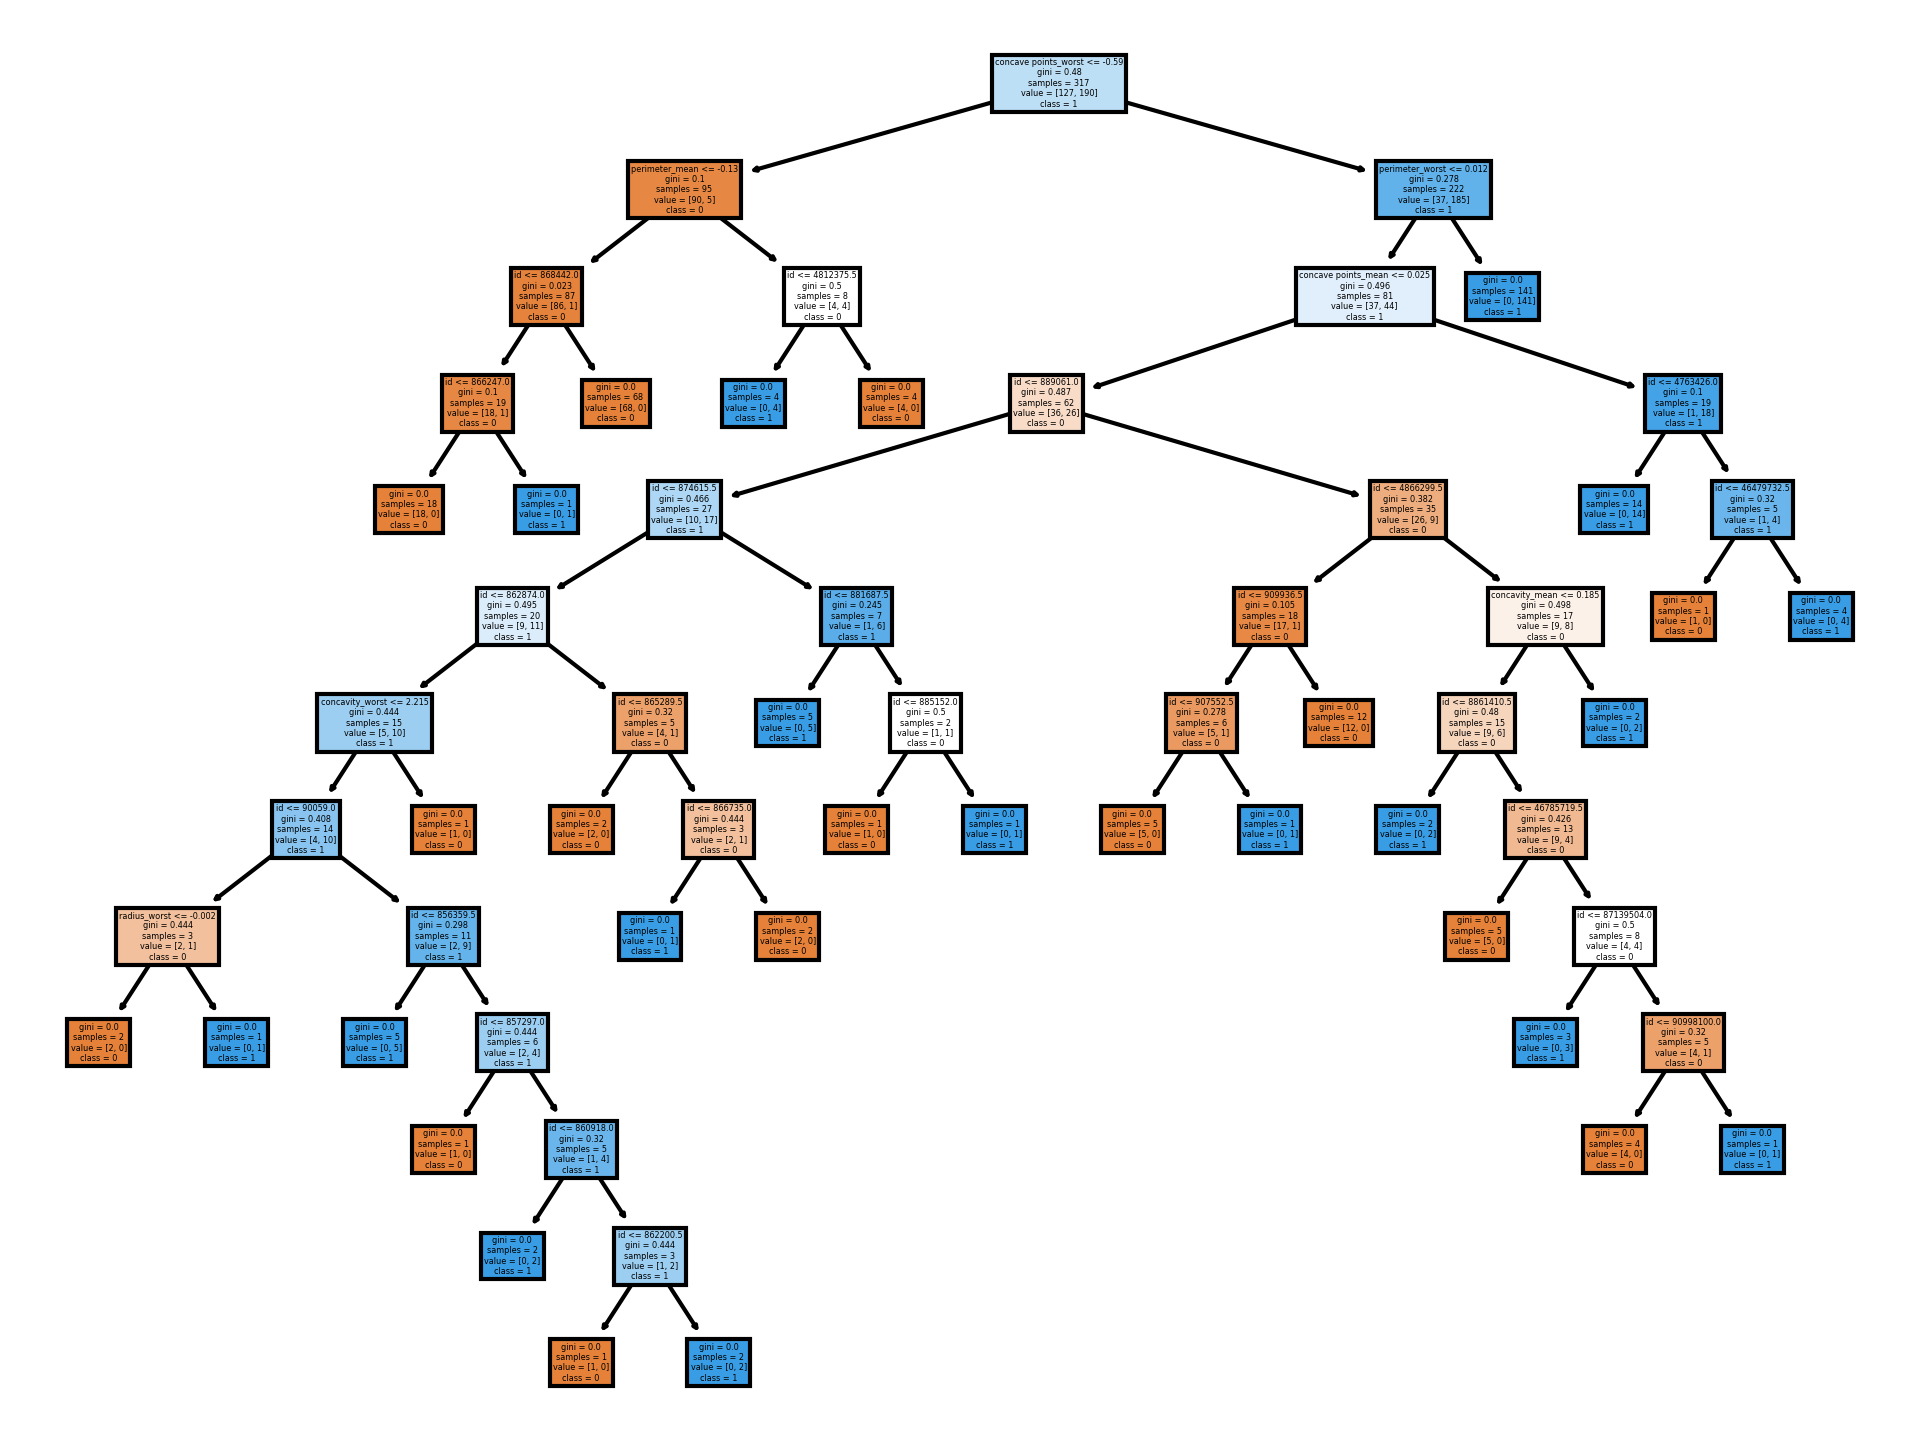

In [21]:
from sklearn import tree

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,6),dpi=300)

cn = [str(diagnosis) for diagnosis in cn] #converts the class names (diagnosis) to strings
tree.plot_tree(Tclf,feature_names=fn,class_names=cn,filled=True);
#plots the decision tree stored in Tclf
#Tclf: Represents the trained decision tree classifier that you want to visualize.
#feature_names=fn: Specifies the names of the features (columns) in the dataset.
#class_names=cn: Specifies the names of the classes (target variable) in the dataset.
#filled=True: Indicates that the tree nodes should be filled with colors to represent class distributions."""

Previously we have used Gini as selection measure now will use IG (entropy) as selection measure to see the differences between them .

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [23]:
Tclf= DecisionTreeClassifier(criterion="entropy") #changing the selection measure to IG (entropy)
Tclf=Tclf.fit(x_train,y_train)
y_pred=Tclf.predict(x_test)

In [24]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9339622641509434


[[39  5]
 [ 2 60]]


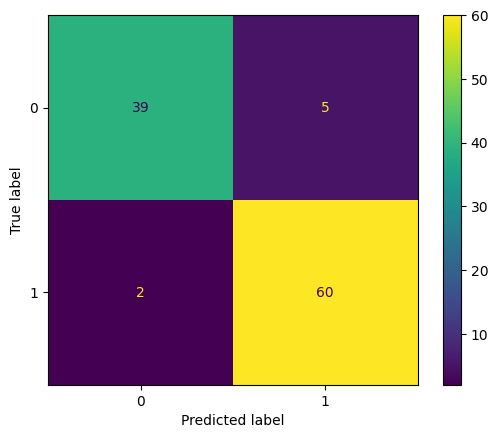

In [25]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df_clas['diagnosis'].unique()

disp=ConfusionMatrixDisplay.from_estimator(Tclf,x_test,y_test, display_labels=cn)

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=1)

In [27]:
Tclf= DecisionTreeClassifier(criterion="entropy") #changing the selection measure to IG (entropy)
Tclf=Tclf.fit(x_train,y_train)
y_pred=Tclf.predict(x_test)

In [28]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9152542372881356


[[63  9]
 [ 6 99]]


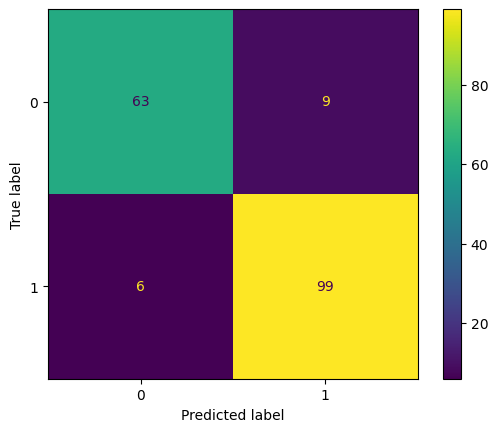

In [29]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df_clas['diagnosis'].unique()

disp=ConfusionMatrixDisplay.from_estimator(Tclf,x_test,y_test, display_labels=cn)

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)

In [31]:
Tclf= DecisionTreeClassifier(criterion="entropy") #changing the selection measure to IG (entropy)
Tclf=Tclf.fit(x_train,y_train)
y_pred=Tclf.predict(x_test)

In [32]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8888888888888888


[[11  3]
 [ 1 21]]


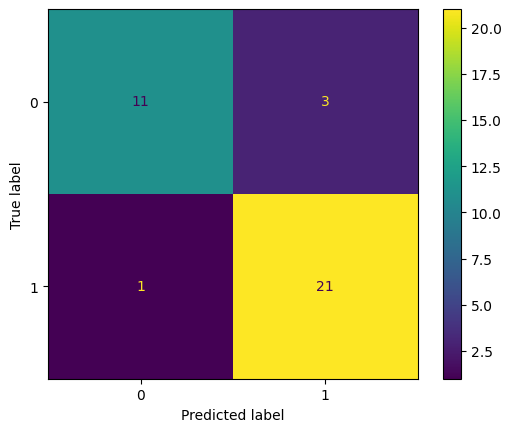

In [33]:
from sklearn.metrics import confusion_matrix ,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test,y_pred)
print(cm)

cn=df_clas['diagnosis'].unique()

disp=ConfusionMatrixDisplay.from_estimator(Tclf,x_test,y_test, display_labels=cn)

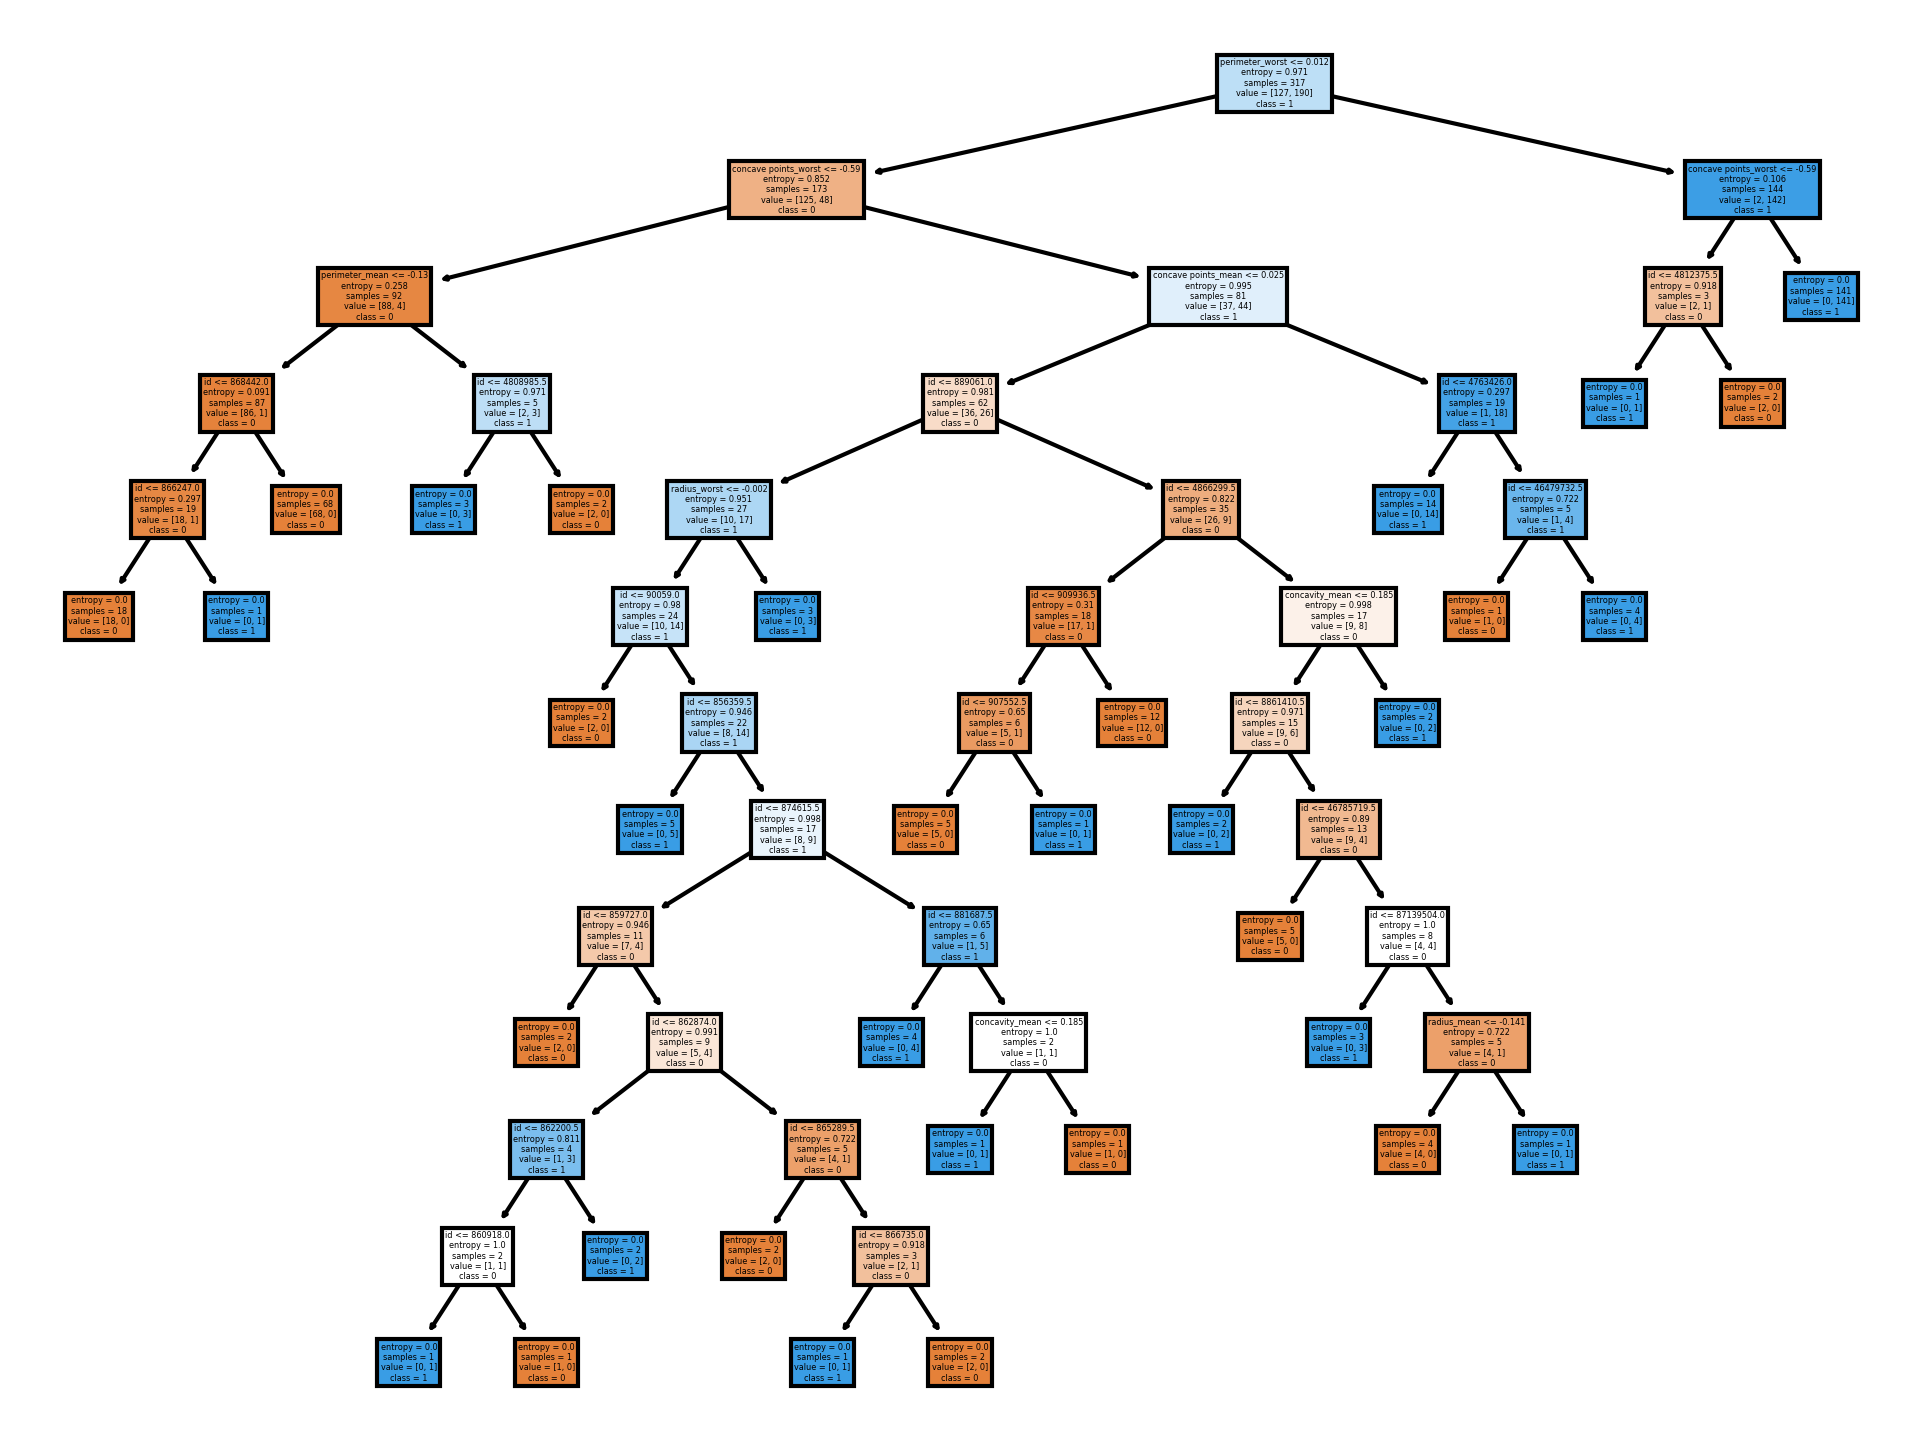

In [34]:
from sklearn import tree

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,6),dpi=300)

cn = [str(diagnosis) for diagnosis in cn]
tree.plot_tree(Tclf,feature_names=fn,class_names=cn,filled=True);


Using Gini : 

* 
Test Size: 30%, Accuracy: 0.933962264150943* 4
Test Size: 50%, Accuracy: 0.9039548022598* 87
Test Size: 10%, Accuracy: 0.888888888888
  8888
Using Information Gain (Entr
p* y):

Test Size: 30%, Accuracy: 0.9245283018* 867925
Test Size: 50%, Accuracy: 0.881355932* 2033898
Test Size: 10%, Accuracy: 0.9166666666666666

In general, there isn't a significant difference in accuracy between using Gini impurity and Information Gain as the selection measures. but in this case  if we prioritize accuracy alone, Gini impurity appears to perform slightly better across different test sizes. However, the differences in accuracy between the two selection measures are relatively small.

if we prioritize the structures of decision trees Gini might have a slightly deeper structure with 14 nodes compared to the tree with Information Gain  with 13 nodes ,so Information Gain  might be considered better in terms of structure.

it's important to note that the choice between Gini impurity and Information Gain often depends on the specific dataset and problem at hand. Both measures aim to achieve similar outcomes in terms of creating effective splits in decision trees, but they may lead to slightly different tree structures and model performances in practice. Therefore, it's recommended to experiment with both measures and choose the one that performs better on the given dataset.

## Clustering

One of the main goals of the project is to apply clusttring to our dataset to detect the class of each row.

### K-means clustering

Firstly we are going to remove the class labels because clustring is an unsopervised learning method which dosen't  have a predifend class.

In [40]:
# Remove the class labels.
# Extract the features (excluding the target variable, if any).
df = pd.read_csv("Processed_dataset.csv")
features= df.drop(df.columns[0], axis=1)

We start to scaling the feature to have the same unnite beacuse K-means algorithm is sensitive to feature scales.

In [41]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
# Scale the variable if needed.
# Use StandardScaler to scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [42]:
# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
# Display the scaled DataFrame
print("\nScaled DataFrame:")
print(df_scaled.head())


Scaled DataFrame:
         id  concave points_worst  perimeter_worst  perimeter_mean  \
0 -0.242572             -1.269231          -0.8446       -0.966879   
1 -0.242938             -1.269231          -0.8446       -0.966879   
2 -0.250045             -1.269231          -0.8446       -0.966879   
3 -0.242477             -1.269231          -0.8446       -0.966879   
4 -0.242899             -1.269231          -0.8446       -0.966879   

   radius_worst  radius_mean  concave points_mean  concavity_mean  area_mean  \
0      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   
1      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   
2      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   
3      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   
4      -0.84516    -0.985477            -0.791684       -0.686121   -0.62856   

   compactness_mean  concavity_worst  
0         -0.695781        -0.628342  
1

We apply K-means clustering using three different sizes of K which is 2 ,4 ,5.
*  K=2 beacuse it's the most common and general number of grop in the domain of cancer.
* K=4 & K=5 following the number of stages of breast cancer by the "TNM" system which has been declared as 4 in some sources and 5 in others.ead)

The result of follwing code shows the cordinates of each cluster when K=2 ,4 and 5 follwing up with the assign cluster to each data point.

In [43]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
#5) Build the K-means model
# Set a seed for random number generation
np.random.seed(8953)

# Define different values of K
k_values = [2, 4, 5]  # Example: using 2, 4, and 5 clusters

# Iterate over each value of K
for k in k_values:
    # Run K-means clustering with the current value of K
    kmeans = KMeans(n_clusters=k, random_state=8953)
    kmeans_result = kmeans.fit(df_scaled)

    # Print the clustering result for the current value of K
    print(f"Cluster Centers (K={k}):")
    print(kmeans_result.cluster_centers_)
    print("\nCluster Labels:")
    print(kmeans_result.labels_)
    print("\n")

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(


Cluster Centers (K=2):
[[-0.13244141 -0.56697613 -0.71798932 -0.66193337 -0.6707933  -0.65272693
  -0.67092297 -0.54020123 -0.62855966 -0.43966985 -0.37619595]
 [ 0.17923738  0.76730769  0.97167888  0.8958165   0.90780693  0.88335711
   0.90798242  0.73107233  0.85065074  0.59501986  0.50911851]]

Cluster Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1
 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1
 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1
 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers (K=4):
[[-0.13038334 -0.68401857 -0.84460049 -0.80341713 -0.82578595 -0.79137269
  -0.71654367 -0.62603623 -0.62855966 -0.50001792 -0.46491417]
 [-0.08482167  1.02840237  0.80296788  0.80272462  0.67831347  0.7519412
   1.10975491  1.24062741  0.64404038  1.25214239  1.12159751]
 [ 8.01849387  0.63153846  1.21156484  1.04081674  1.17749415  1.04096961
   0.5157518   1.05632976  1.31776982  0.02133052  0.12996485]
 [-0.12263307  0.12725275  0.8199143   0.73010193  0.9607812   0.77560163
   0.09550469 -0.36252278  0.51143332 -0.61894777 -0.52001285]]

Cluster Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 3 1 3 1 1 1 0 3
 0 1 1 3 3 1 0 1 1 3 1 1 1 3 1 1 1 3 1 3 1 0 1 1 1 3 0 0 0 0 0 1 0 0 1 0 1
 3 3 3 1 0 0 3 1 0 3 1 1 1 1 3 0 1 0 

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers (K=5):
[[-0.12598356  0.10731838  0.74987957  0.70620079  0.88720582  0.75013703
   0.11625764 -0.39571232  0.45273449 -0.57128261 -0.49669189]
 [-0.12663378 -0.76858173 -0.84460049 -0.81002771 -0.82409072 -0.7954974
  -0.77125496 -0.68612073 -0.62855966 -0.59493733 -0.59279681]
 [-0.10022496  1.03222326  1.11962249  1.0734622   1.08705026  1.03273202
   1.24121902  1.26882372  1.00920539  1.20631384  0.92063895]
 [ 8.01849387  0.63153846  1.21156484  1.04081674  1.17749415  1.04096961
   0.5157518   1.05632976  1.31776982  0.02133052  0.12996485]
 [-0.07475888  0.80723982 -0.49182702 -0.42558844 -0.79558518 -0.48879872
   0.31386838  0.85133558 -0.62855966  1.09699804  1.60197318]]

Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 4 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1

### Evaluation of clustering

We used two different evaluation methods and metrics (Silhouette coefficient, Elbow (total within-cluster sum of square) To evaluate and represent the result from the previos cell.

#### 1-Silhouette coefficient

The first evaluation is done using Silhouette coefficient.

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


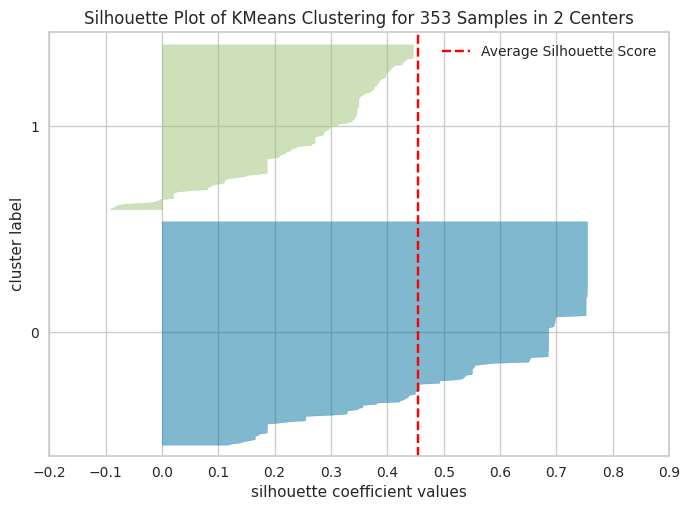

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


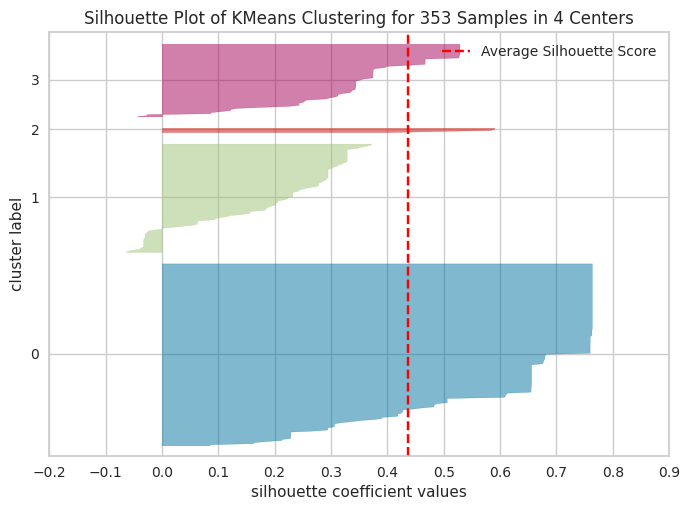

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


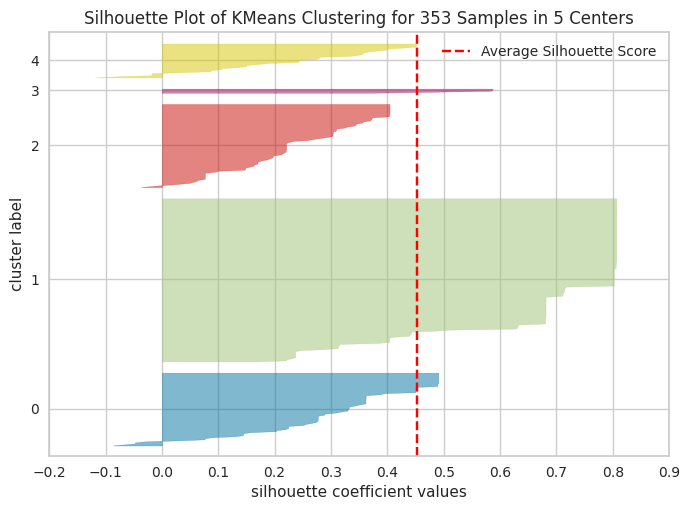

In [48]:
# Visual the model using (SilhouetteVisualizer)
%pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

# Define different values of K
k_values = [2, 4, 5]  # Example: using 2, 3, and 4 clusters

# Iterate over each value of K
for k in k_values:
    # Run K-means clustering with the current value of K
    kmeans = KMeans(n_clusters=k, random_state=8953)
    kmeans_result = kmeans.fit(df_scaled)

    # Visualize the clustering model with SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(df_scaled)
    visualizer.show()

The silhouette coefficient value which is represented by doted line help us to know which number of clustring is better. The higher the silhouette coefficient value the better number of clusters K.

* When K=2 silhouette coefficient value = 0.45.
* When K=4 silhouette coefficient value = 0.43.
* When K=5 silhouette coefficient value = 0.44.

Which means the best choice is K=2.

#### 2-Elbow method

The second evaluation method used is Elbow method where the best nuber of cluster is the turning point in the curve.

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


WCSS for k=1: 3883.0000000000014


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


WCSS for k=2: 2143.8081574065227


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


WCSS for k=3: 1738.565335825889


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


WCSS for k=4: 1419.0988219598173


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


WCSS for k=5: 1165.7570631432993


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


WCSS for k=6: 1004.5214820001673


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


WCSS for k=7: 882.8323017173


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


WCSS for k=8: 809.1630430690636


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


WCSS for k=9: 759.2768418428673


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


WCSS for k=10: 711.3575743167271


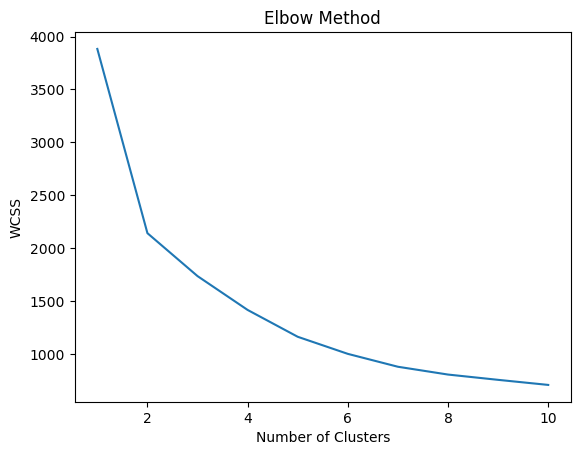

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Calculate the total within-cluster sum of squares (WCSS) for different values of k
wcss = []
for i in range(1, 11):  # Try different values of k from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=8953)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
    # Print the WCSS value for the current value of k
    print(f"WCSS for k={i}: {kmeans.inertia_}")

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


After visually diplying the graph -which represent total within-cluster sum of square (WSS) with respect to K- we can clearly see tht the turning point is intersect with Number of cluster=2 Which means that the best number of cluster is 2 clusters.